# SBI Life insurance Dataset

In [1]:
## import essential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## load the dataset :
data=pd.read_csv('SBI_Life_insurance.csv')

In [3]:
## let's check the first five records :
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
## shape of the dataset( total number of rows and columns)
data.shape

(1338, 8)

In [5]:
## dataset information :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
## let's check the nullvalues :
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

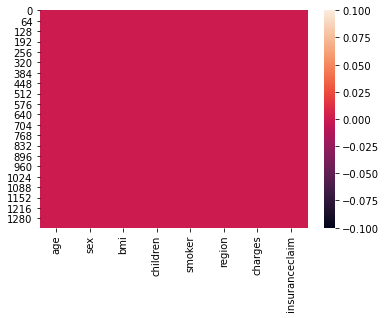

In [7]:
## check by the heatmap( nullvalues) :
sns.heatmap(data.isnull())

In [8]:
## Stastistical Analysis :
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [9]:
## corelation :
dfr=data.corr()
dfr

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


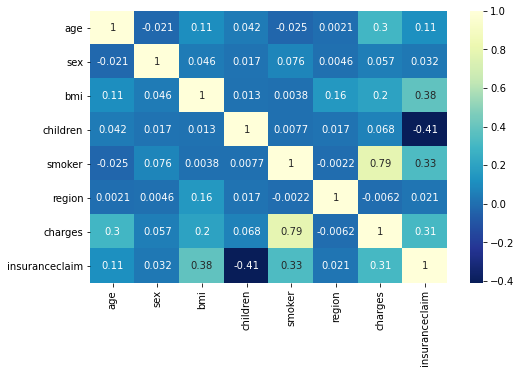

In [10]:
## Analysis by seaborn library heatmap :
plt.figure(figsize=(8,5))
sns.heatmap(dfr,annot=True,cmap='YlGnBu_r')
plt.show()

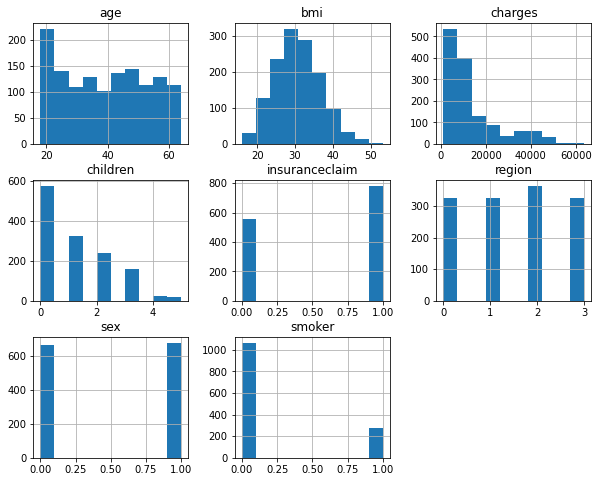

In [11]:
data.hist(figsize=(10,8))
plt.show()

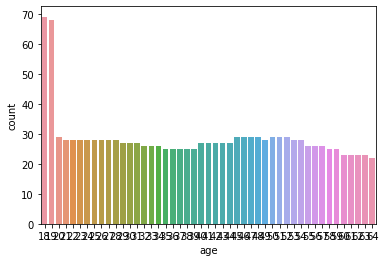

In [12]:
data['age'].value_counts()
sns.countplot(data['age'])

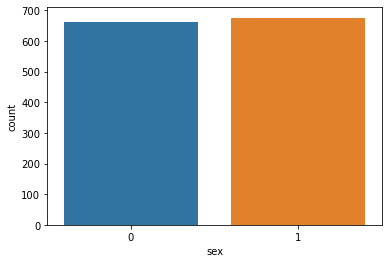

In [13]:
## Univariate Analysis :
sns.countplot(data['sex'])

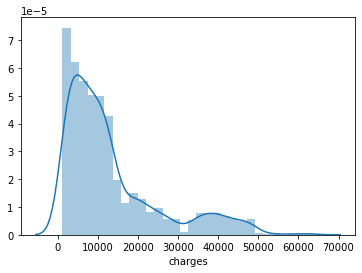

In [14]:
## Univariate Analysis :
sns.distplot(data['charges'])

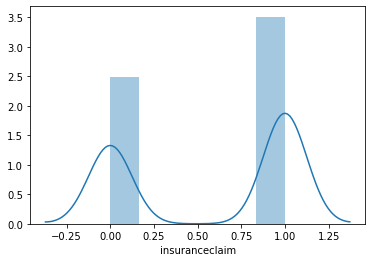

In [15]:
sns.distplot(data['insuranceclaim'])

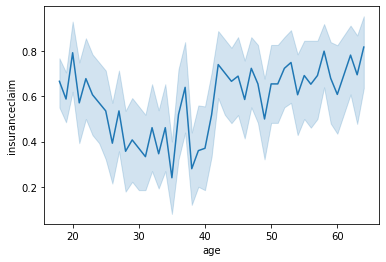

In [16]:
## lineplot using seanborn library :
sns.lineplot(x='age',y='insuranceclaim',data=data)

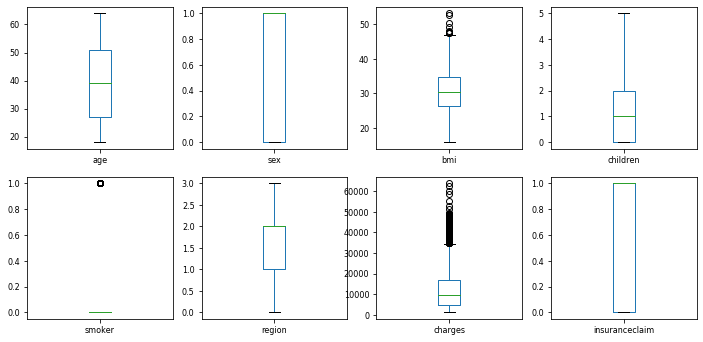

In [17]:
data.plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(12,12))
plt.show()

In [18]:
## check the skewd values :
data.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [19]:
## using for loop for removing skewness from the data :
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [20]:
data.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

In [21]:
## Splitting the values in X and y :
X=data.drop(['insuranceclaim'],axis=1)
y=data['insuranceclaim']

In [22]:
X.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0.000000,0.693147,3,9.734236
1,18,1,33.77,0.693147,0.000000,2,7.453882


In [23]:
y.head(2)

0    1
1    1
Name: insuranceclaim, dtype: int64

In [24]:
## importing skitlearn for splitting the data :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [25]:
## importing Libraries :
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [26]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier()]


for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8656716417910447
[[ 90  17]
 [ 19 142]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       107
           1       0.89      0.88      0.89       161

    accuracy                           0.87       268
   macro avg       0.86      0.86      0.86       268
weighted avg       0.87      0.87      0.87       268



Accuracy score of DecisionTreeClassifier() is:
0.9776119402985075
[[103   4]
 [  2 159]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       107
           1       0.98      0.99      0.98       161

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268



Accuracy score of SVC() is:
0.7238805970149254
[[ 54  53]
 [ 21 140]]
              precision    recall  f1-score   support

           0       0.72      0.50      0.59

Observation is that DecisionTreeClassifier pridicts the more accuracy.
We will go with DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
predm=dt.predict(X_test)
print('Accuracy score of',dt,'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))


Accuracy score of DecisionTreeClassifier() is:
0.9776119402985075
[[103   4]
 [  2 159]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       107
           1       0.98      0.99      0.98       161

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268



In [28]:
import joblib
joblib.dump(dt,'data.csv')

['data.csv']